In [35]:
#下面这行代码，是为了把自己编写的代码文件当作一共模块导入，这里是把Utilities文件夹中的plotting.py文件当作python的模块导入，对应的是下面的from plotting import newfig, savefig。路径要随着不同设备的系统做相应的修改
import sys #导入sys模块。sys模块提供了一些变量和函数，用于与 Python解释器进行交互和访问。例如，sys.path 是一个 Python 在导入模块时会查找的路径列表，sys.argv 是一个包含命令行参数的列表，sys.exit() 函数可以用于退出 Python 程序。导入 sys 模块后，你就可以在你的程序中使用这些变量和函数了。
# sys.path.insert(0, '../../../Utilities/') #在 Python的sys.path列表中插入一个新的路径。sys.path是一个 Python 在导入模块时会查找的路径列表。新的路径'../../Utilities/'相对于当前脚本的路径。当你尝试导入一个模块时，Python 会在 sys.path 列表中的路径下查找这个模块。通过在列表开始位置插入一个路径，你可以让 Python 优先在这个路径下查找模块。这在你需要导入自定义模块或者不在 Python 标准库中的模块时非常有用。

import torch
#collections是python一个内置模块，提供了一些有用的数据结构
from collections import OrderedDict  #这个类是字典dict的一个子类，用于创建有序的字典。普通字典中元素顺序是无序的，在OrderedDict中元素的顺序是有序的，元素的顺序是按照它们被添加到字典中的顺序决定的。

from pyDOE import lhs #`pyDOE`是一个Python库，用于设计实验。它提供了一些函数来生成各种设计，如因子设计、拉丁超立方设计等。`lhs`是库中的一个函数，全名为"Latin Hypercube Sampling"，拉丁超立方采样。这是一种统计方法，用于生成一个近似均匀分布的多维样本点集。它在参数空间中生成一个非常均匀的样本，这对于高维数值优化问题非常有用，因为它可以更好地覆盖参数空间。
import numpy as np
import matplotlib.pyplot as plt
import scipy.io #导入了scipy库中的io模块。scipy.io模块包含了一些用于文件输入/输出的函数，例如读取和写入.mat文件（MATLAB格式）
from scipy.interpolate import griddata #`scipy.interpolate`是`scipy`库中的一个模块，提供了许多插值工具，用于在给定的离散数据点之间进行插值和拟合。`griddata`是这个模块中的一个函数，用于在无规则的数据点上进行插值。

import random

import skopt #用于优化问题的库，特别是机器学习中的超参数优化
from distutils.version import LooseVersion #distutils是Python的一个标准库，用于构建和安装Python包。LooseVersion是一个类，用于比较版本号


# from plotting_torch import newfig, savefig #从自定义的plotting_torch.py文件中导入了newfig和savefig函数。这两个函数用于创建和保存图形。这两个函数的定义在plotting_torch.py文件中

from mpl_toolkits.axes_grid1 import make_axes_locatable #`mpl_toolkits.axes_grid1`是`matplotlib`库的一个模块，提供了一些高级的工具来控制matplotlib图形中的坐标轴和颜色条。`make_axes_locatable`是模块中的一个函数，用于创建一个可分割的坐标轴。可以在这个坐标轴的四个方向（上、下、左、右）添加新的坐标轴或颜色条。
import matplotlib.gridspec as gridspec #是`matplotlib`库的一个模块，用于创建一个网格布局来放置子图。在`matplotlib`中可以创建一个或多个子图（subplot），每个子图都有自己的坐标轴，并可以在其中绘制图形。`gridspec`模块提供了一个灵活的方式来创建和放置子图。
import time #一个内置模块，用于处理时间相关的操作。


from tqdm import tqdm #一个快速，可扩展的python进度条库，可以在python长循环中添加一个进度提示信息，用户只需要封装任意的迭代器tqdm(iterator)。

import seaborn as sns  # 导入seaborn库用于绘制密度图

from sklearn.cluster import KMeans #sklearn是一个广泛使用的机器学习库，提供了各种算法和工具用于数据挖掘和分析。Kmeans是聚类算法，用于将数据分成预先指定数量的簇
import faiss #一种高效的相似性搜索和密集向量聚类库，适用于在大规模数据中进行高维向量的搜索和聚类操作
#faiss的安装方法：conda install -c conda-forge faiss-gpu
import matplotlib.cm as cm

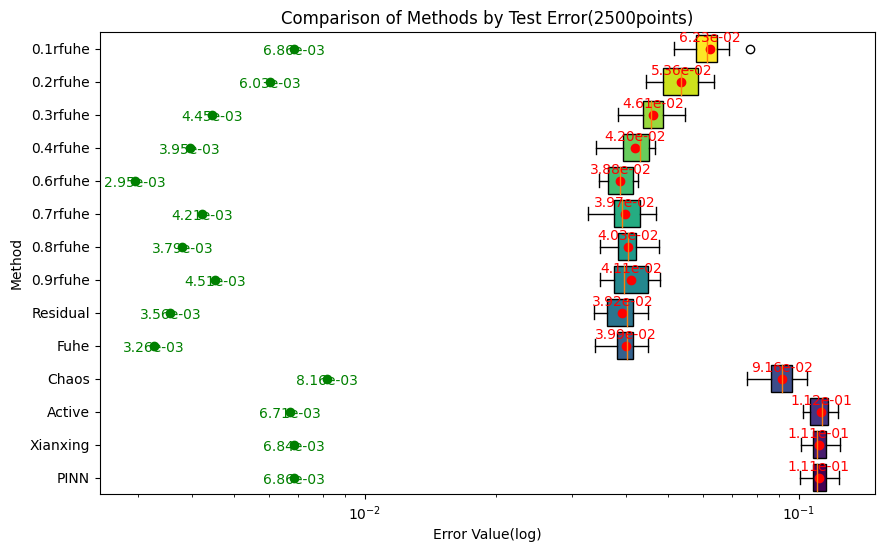

In [36]:
# 示例数据
methods = ['PINN', 'Xianxing', 'Active', 'Chaos', 'Fuhe', 'Residual', '0.9rfuhe', '0.8rfuhe', '0.7rfuhe', '0.6rfuhe', '0.4rfuhe', '0.3rfuhe', '0.2rfuhe', '0.1rfuhe']
seeds = range(10)
loss_values = {
    'PINN': [0.10951798750133379, 0.10183787665689226, 0.1189477691561206, 0.10762772406889842, 0.11100920378642685, 0.11151659055734985, 0.11652317621149633, 0.10851766478985546, 0.10090298243832803, 0.12409818701169566],
    'Xianxing': [0.10942708580681862, 0.10192893674845316, 0.11891783576651511, 0.10774122851650964, 0.11104264669911797, 0.11152132442611709, 0.11649881926756638, 0.10854079227255978, 0.10094575384989839, 0.12414611160463329],
    'Active': [0.10383057945995419, 0.10410532957983201, 0.11517459779130232, 0.11958337005471349, 0.11760562588951438, 0.11250545007515178, 0.11256499613534632, 0.1137203719831775, 0.10222197264593057, 0.12315323783790517],
    'Chaos': [0.08847214207816524, 0.07589748950108301, 0.1042852172035409, 0.08446197836462833, 0.09691457862465393, 0.08834750215591877, 0.0957372038213243, 0.09486608444997259, 0.0857572662840853, 0.10143004776851879],
    'Fuhe': [0.03782901411579611, 0.041677792080892936, 0.04463661499971465, 0.03640957741047573, 0.04119070515762053, 0.0405708196535416, 0.038533127920878846, 0.039656811175773375, 0.033880776062506925, 0.04481614409048821],
    'Residual': [0.03441081443365548, 0.04147713348144952, 0.041450366627812756, 0.03748462585549333, 0.03579238605761997, 0.0424779530159773, 0.03371366523232769, 0.04486720670760814, 0.04160134447356883, 0.03872383439476216],
    '0.9rfuhe': [0.034740167313694795, 0.04707772325329933, 0.039480782326954685, 0.039590284580993985, 0.03692924010374997, 0.047831862060252875, 0.035725476940192395, 0.0446150754561652, 0.04513688978910674, 0.039636064420795016],
    '0.8rfuhe': [0.03482010580123695, 0.0475786659284806, 0.039838879592086325, 0.04101111134855644, 0.038109486076647804, 0.0447916439929948, 0.035104208646594096, 0.041001274920855875, 0.04243523089751817, 0.03850158571775886],
    '0.7rfuhe': [0.03408657695436992, 0.046924313554642216, 0.03824967643710745, 0.04348767563974743, 0.037192208427718275, 0.04313651550370958, 0.03265689022964176, 0.04267447205316045, 0.039241191228239145, 0.039121409948782264],
    '0.6rfuhe': [0.036630407731541755, 0.04253148334685307, 0.04246758234850077, 0.036319151819590965, 0.03692138108668539, 0.041718543886377975, 0.03466827199131037, 0.04045418410198554, 0.035301610091118436, 0.040977994755547774],
    '0.4rfuhe': [0.04216506270908811, 0.03780130001558901, 0.046567184968003814, 0.039301581678551106, 0.04524659934566512, 0.04498982527686643, 0.04389493378072487, 0.03944931459422614, 0.03404362406100258, 0.04615689634739882],
    '0.3rfuhe': [0.044577080810742714, 0.04379639096125566, 0.0506988382347688, 0.044017956820807266, 0.04663432070667082, 0.0474450490421618, 0.04913022316851444, 0.04153420238976155, 0.038287371826749364, 0.054548249154992845],
    '0.2rfuhe': [0.054626455710601006, 0.048059685075184454, 0.0606354297984854, 0.05017305799073178, 0.05615271418136063, 0.0523543123097584, 0.059206028414468474, 0.04676671298095409, 0.044494817439111246, 0.06367675938245736],
    '0.1rfuhe': [0.06506655072485536, 0.056781337654396656, 0.06899881506778048, 0.05869248072054014, 0.06375931744065547, 0.05908331784791711, 0.06408002929540439, 0.057813834603006625, 0.05165226267915728, 0.07729477098196612]
}

# 创建图像
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制箱线图
data = [loss_values[method] for method in methods]
box = ax.boxplot(data, vert=False, patch_artist=True, labels=methods, widths=0.8)

# 生成颜色
colors = cm.viridis(np.linspace(0, 1, len(methods)))
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# 设置对数刻度
ax.set_xscale('log')


# 计算均值和标准差，并在图中标注
for i, method in enumerate(methods):
    mean = np.mean(loss_values[method])
    std = np.std(loss_values[method])
    ax.scatter(mean, i + 1, color='red', zorder=2)  # 标注均值
    ax.scatter(std, i + 1, color='green', zorder=2)  # 标注标准差
    ax.text(mean, i + 1.2, f'{mean:.2e}', color='red', ha='center')  # 标注均值具体值
    ax.text(std, i + 0.8, f'{std:.2e}', color='green', ha='center')  # 标注标准差具体值

# 添加标题和标签
ax.set_title('Comparison of Methods by Test Error(2500points)')
ax.set_xlabel('Error Value(log)')
ax.set_ylabel('Method')

# 显示图像
plt.show()

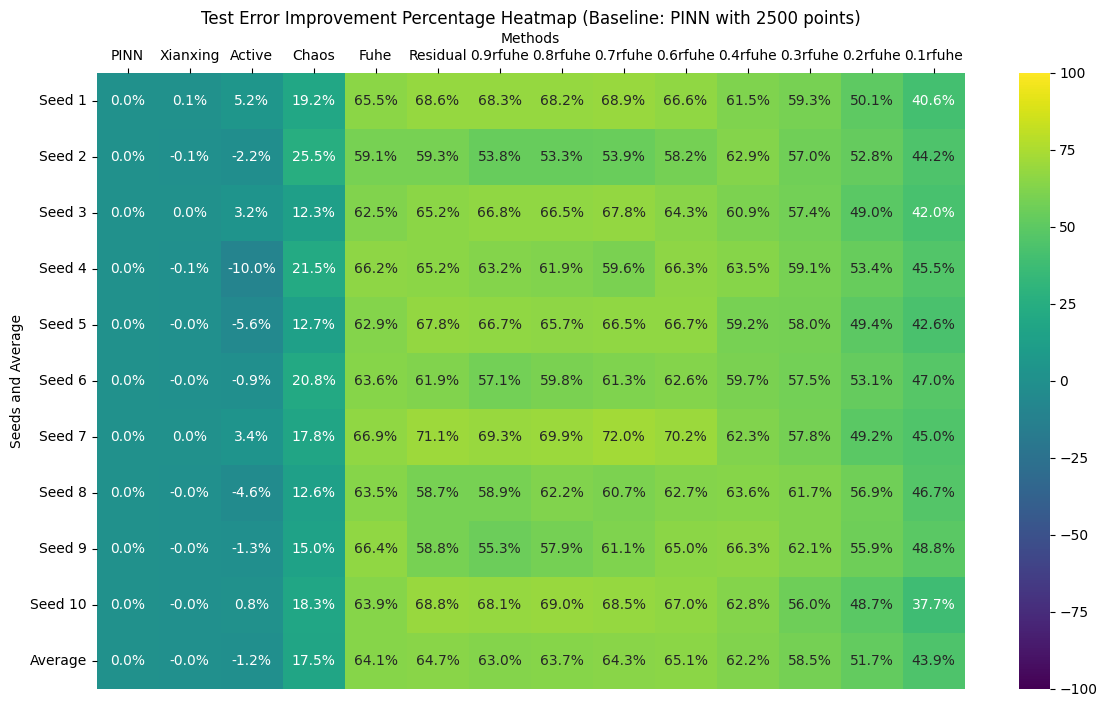

In [37]:
# 选择基准方法
baseline_method = 'PINN'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'Test Error Improvement Percentage Heatmap (Baseline: {baseline_method} with 2500 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



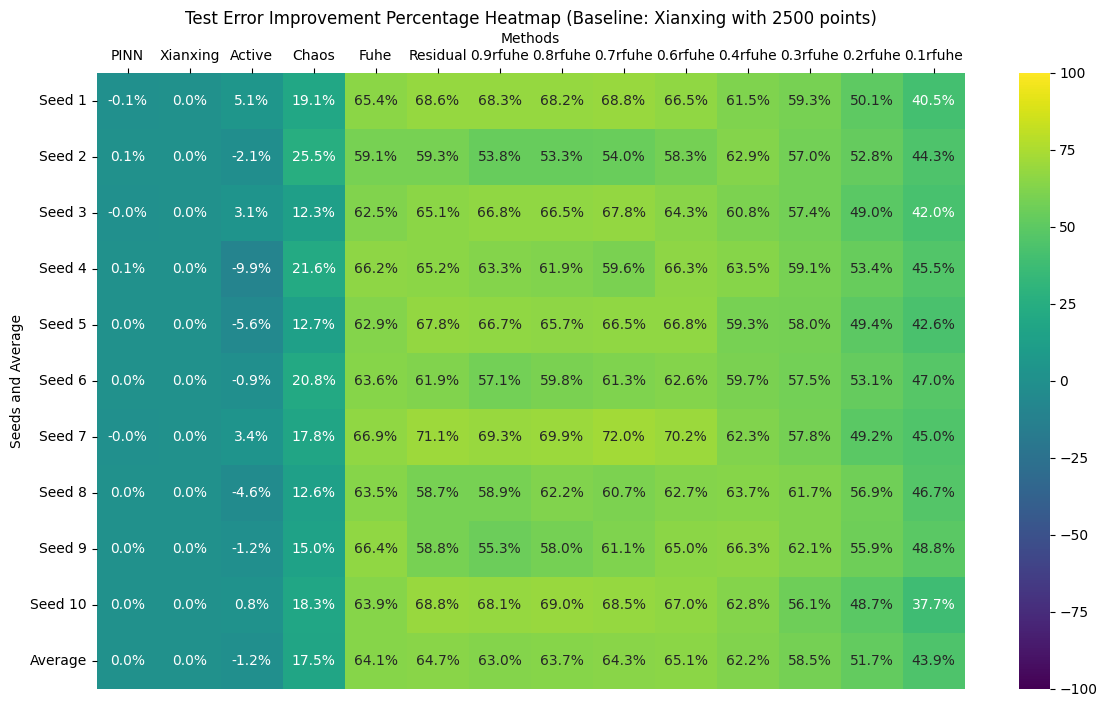

In [38]:
# 选择基准方法
baseline_method = 'Xianxing'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'Test Error Improvement Percentage Heatmap (Baseline: {baseline_method} with 2500 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



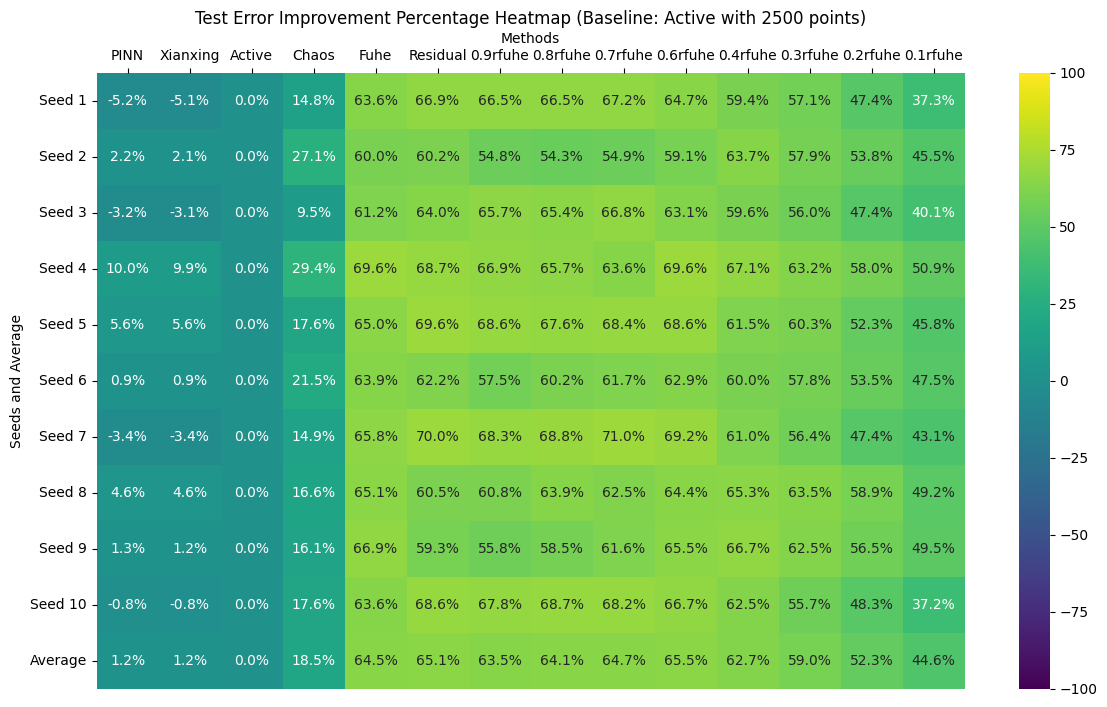

In [39]:
# 选择基准方法
baseline_method = 'Active'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'Test Error Improvement Percentage Heatmap (Baseline: {baseline_method} with 2500 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



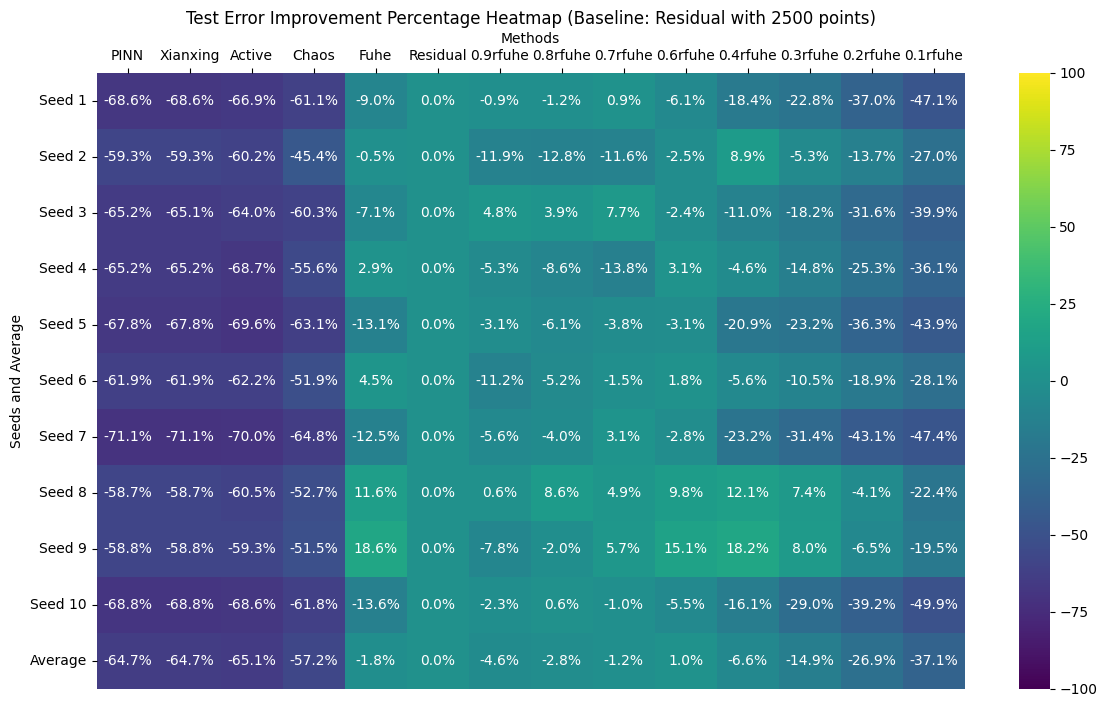

In [40]:
# 选择基准方法
baseline_method = 'Residual'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'Test Error Improvement Percentage Heatmap (Baseline: {baseline_method} with 2500 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



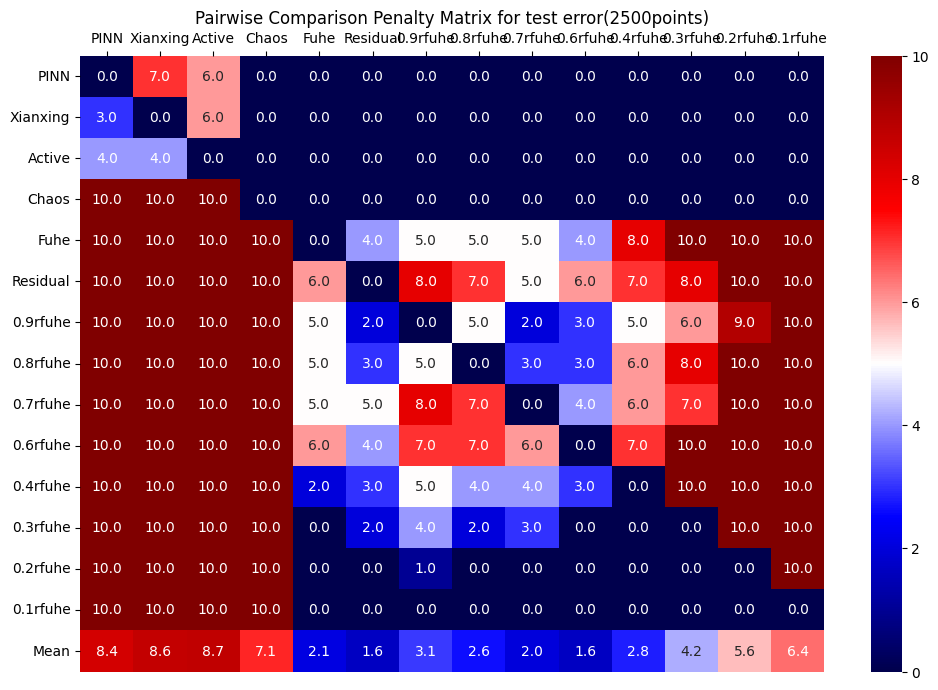

In [41]:
# 初始化惩罚矩阵
n_methods = len(methods)
penalty_matrix = np.zeros((n_methods, n_methods))

# 计算惩罚矩阵
for i, method_i in enumerate(methods):
    for j, method_j in enumerate(methods):
        if i != j:
            for k in range(len(loss_values[method_i])):
                if loss_values[method_i][k] < loss_values[method_j][k]:
                    penalty_matrix[i, j] += 1

# 计算列平均值
column_means = np.mean(penalty_matrix, axis=0)

# 添加列平均值到惩罚矩阵的底部
penalty_matrix_with_means = np.vstack([penalty_matrix, column_means])

# 创建热图
plt.figure(figsize=(12, 8))
ax = sns.heatmap(penalty_matrix_with_means, annot=True, fmt=".1f", cmap="seismic", xticklabels=methods, yticklabels=methods + ['Mean']) #cmap是颜色映射，annot是是否显示数值，fmt是数值格式

# 将x轴标签移动到顶部
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title('Pairwise Comparison Penalty Matrix for test error(2500points)')
# plt.xlabel('Methods')
# plt.ylabel('Methods')
plt.show()


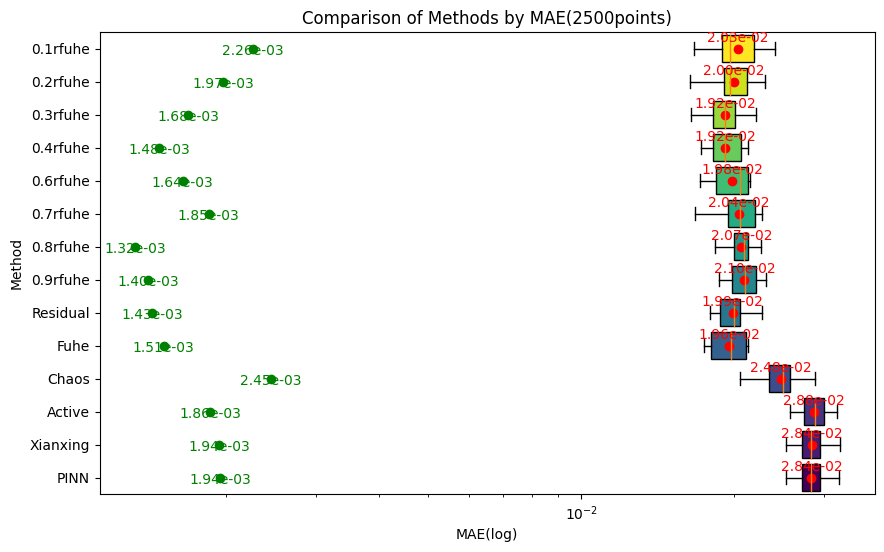

In [42]:
# 示例数据
methods = ['PINN', 'Xianxing', 'Active', 'Chaos', 'Fuhe', 'Residual', '0.9rfuhe', '0.8rfuhe', '0.7rfuhe', '0.6rfuhe', '0.4rfuhe', '0.3rfuhe', '0.2rfuhe', '0.1rfuhe']
seeds = range(10)
loss_values = {
    'PINN': [0.028070053619074026, 0.026338193713197136, 0.030470913261111992, 0.027107696957875918, 0.02869663332553704, 0.028535823756108275, 0.029815181802409833, 0.02753266086538178, 0.025278490208986024, 0.0322505568766075],
    'Xianxing': [0.0280333832632201, 0.026359677750054652, 0.030462567433489234, 0.02713714742400141, 0.028706604720039816, 0.0285334276000747, 0.02981251550263575, 0.02753850104136023, 0.02528936319875032, 0.03226299839536875],
    'Active': [0.026102150966400083, 0.027040610110001754, 0.030187480607483698, 0.02983430300412123, 0.03043624380152641, 0.02868151308624183, 0.028942831187902744, 0.028692925587829, 0.025784260435891344, 0.03187859548396111],
    'Chaos': [0.02543159478603685, 0.02051219739787445, 0.028855516708196853, 0.02290346165977318, 0.02592815856181138, 0.024854385639884565, 0.024800443307378836, 0.025160847725893474, 0.02149491524713199, 0.027792473719552284],
    'Fuhe': [0.01793623067136379, 0.02127053149039519, 0.021191993313188755, 0.019064997356985535, 0.0181113487816629, 0.020447421172895407, 0.01748730086170203, 0.021094967026106606, 0.01799477972597875, 0.021051427212527406],
    'Residual': [0.017939147207101616, 0.020576470535841287, 0.01993584597104144, 0.019611539925388274, 0.01843730637696697, 0.021287570892055133, 0.017993258335933383, 0.022744517367221273, 0.019967991591285685, 0.020342446380560538],
    '0.9rfuhe': [0.018645934985076596, 0.022482951377125304, 0.020983743311195503, 0.02062120250543031, 0.01950828893990013, 0.023093082214845472, 0.019455167415889835, 0.022680374811340866, 0.021096893326860898, 0.021032478693513424],
    '0.8rfuhe': [0.018731078027523097, 0.022555530105498836, 0.02131908342962144, 0.021165464070870242, 0.01977396757476453, 0.022358042647324102, 0.018317179850070756, 0.021216652655635278, 0.02056760955148846, 0.020629226968187104],
    '0.7rfuhe': [0.018279390346017096, 0.022677360853807213, 0.02027279119033767, 0.022416603384599033, 0.019344336482566723, 0.02203541682517282, 0.016768683590936515, 0.0219806405910316, 0.01961978232271146, 0.020894670972788514],
    '0.6rfuhe': [0.01833501057854602, 0.02137595781624462, 0.021208578770502428, 0.019790156960283585, 0.017756122576353735, 0.021404374792103383, 0.017126643585185966, 0.021222630766738314, 0.018557253320479587, 0.021483354409323627],
    '0.4rfuhe': [0.019332155696863727, 0.017186053602946377, 0.02134886943529531, 0.0190340622179875, 0.01835298439868771, 0.021043628265069808, 0.018098151613511256, 0.01941869823864901, 0.0172327639706474, 0.021147949682437286],
    '0.3rfuhe': [0.019469959344713288, 0.017344957973593686, 0.02167243184456852, 0.019404556667323096, 0.018414729539300175, 0.02034024349615935, 0.018120475016908465, 0.01897757373919689, 0.01648334914073848, 0.02206586689134943],
    '0.2rfuhe': [0.02117773989525566, 0.01800787737550897, 0.02279021050737724, 0.01912183863394723, 0.019894288890188277, 0.021272478367946285, 0.01941803482799859, 0.019133132489595382, 0.016345366479646767, 0.022966042799215523],
    '0.1rfuhe': [0.02188268728636712, 0.01833714969750066, 0.023465991652634185, 0.019311159792653052, 0.019983685244772415, 0.021752396317209325, 0.01890553996624225, 0.01904416851582526, 0.016639126485630353, 0.024102632647825247]
}

# 创建图像
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制箱线图
data = [loss_values[method] for method in methods]
box = ax.boxplot(data, vert=False, patch_artist=True, labels=methods, widths=0.8)

# 生成颜色
colors = cm.viridis(np.linspace(0, 1, len(methods)))
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# 设置对数刻度
ax.set_xscale('log')

# 计算均值和标准差，并在图中标注
for i, method in enumerate(methods):
    mean = np.mean(loss_values[method])
    std = np.std(loss_values[method])
    ax.scatter(mean, i + 1, color='red', zorder=2)  # 标注均值
    ax.scatter(std, i + 1, color='green', zorder=2)  # 标注标准差
    ax.text(mean, i + 1.2, f'{mean:.2e}', color='red', ha='center')  # 标注均值具体值
    ax.text(std, i + 0.8, f'{std:.2e}', color='green', ha='center')  # 标注标准差具体值

# 添加标题和标签
ax.set_title('Comparison of Methods by MAE(2500points)')
ax.set_xlabel('MAE(log)')
ax.set_ylabel('Method')

# 显示图像
plt.show()

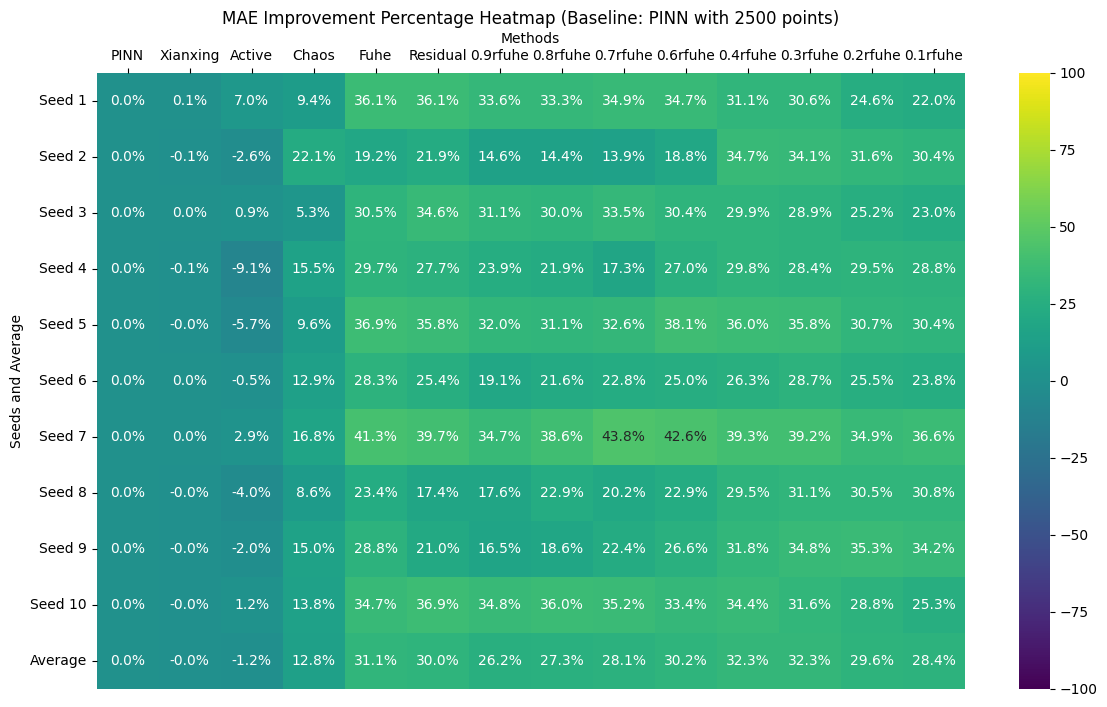

In [43]:
# 选择基准方法
baseline_method = 'PINN'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MAE Improvement Percentage Heatmap (Baseline: {baseline_method} with 2500 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



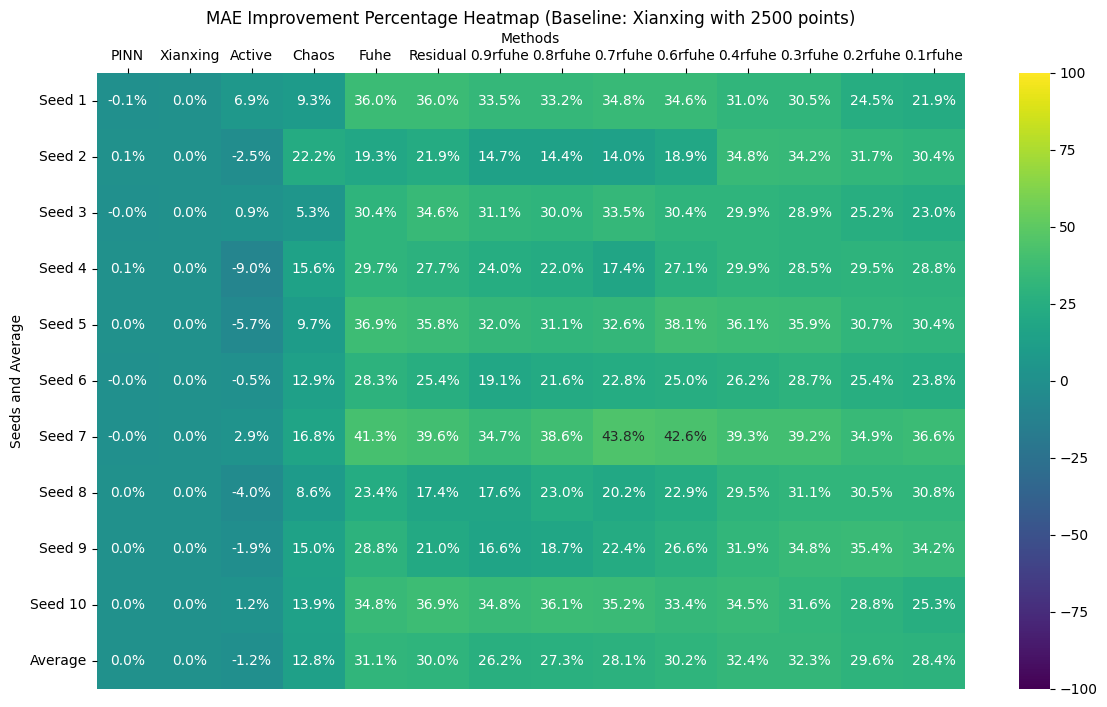

In [44]:
# 选择基准方法
baseline_method = 'Xianxing'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MAE Improvement Percentage Heatmap (Baseline: {baseline_method} with 2500 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



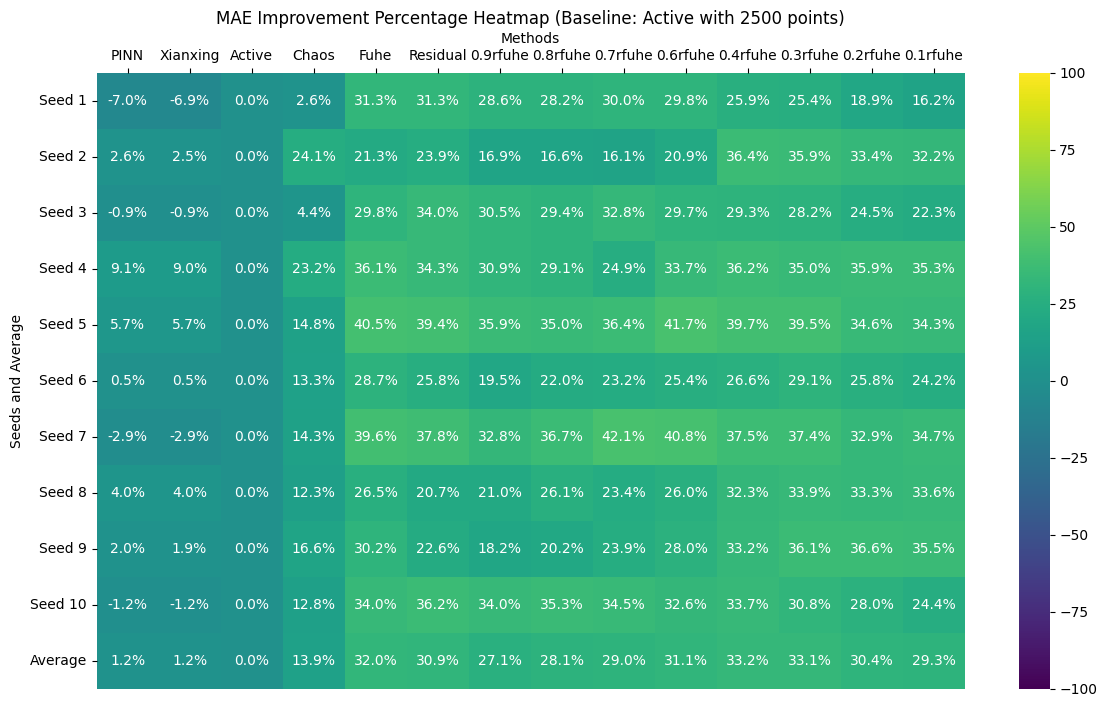

In [45]:
# 选择基准方法
baseline_method = 'Active'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MAE Improvement Percentage Heatmap (Baseline: {baseline_method} with 2500 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



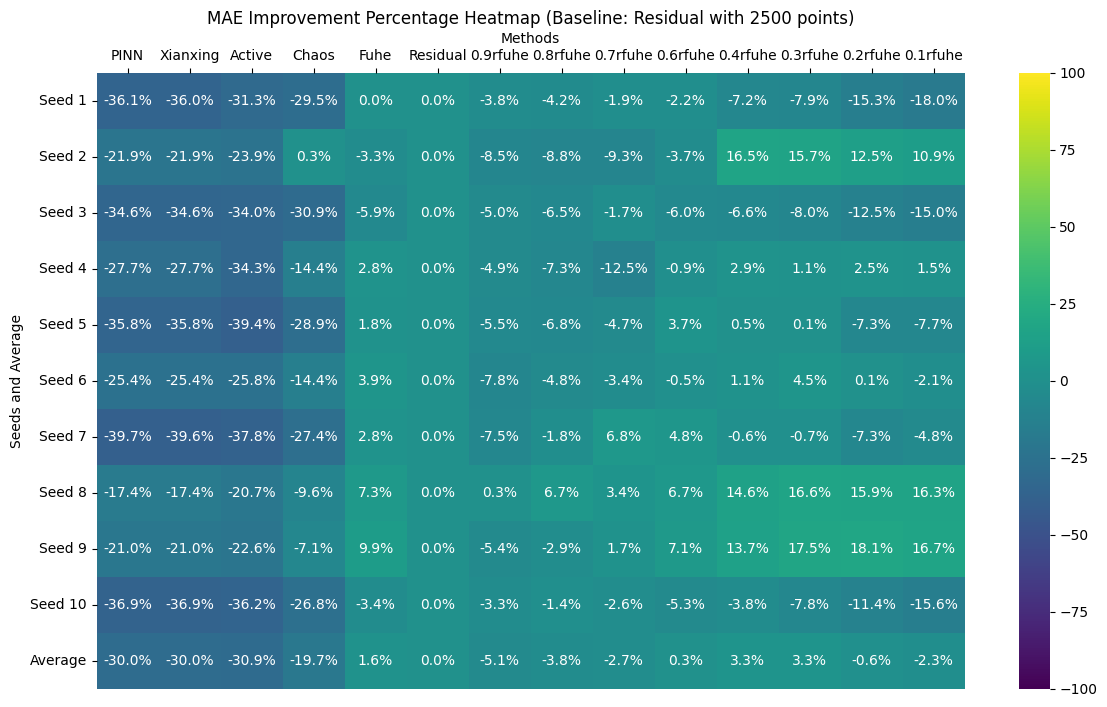

In [46]:
# 选择基准方法
baseline_method = 'Residual'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MAE Improvement Percentage Heatmap (Baseline: {baseline_method} with 2500 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



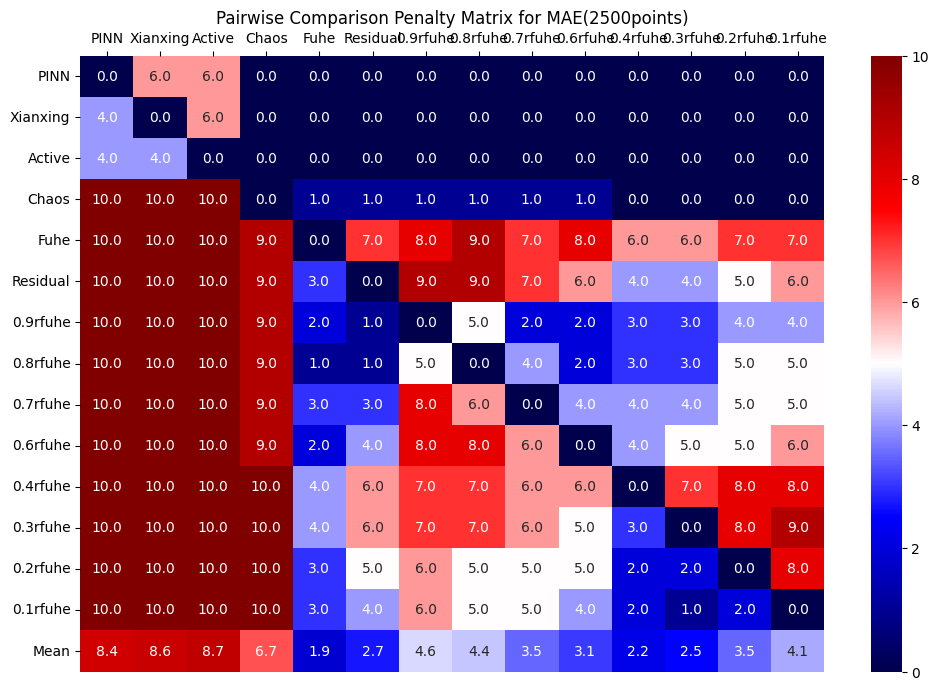

In [47]:
# 初始化惩罚矩阵
n_methods = len(methods)
penalty_matrix = np.zeros((n_methods, n_methods))

# 计算惩罚矩阵
for i, method_i in enumerate(methods):
    for j, method_j in enumerate(methods):
        if i != j:
            for k in range(len(loss_values[method_i])):
                if loss_values[method_i][k] < loss_values[method_j][k]:
                    penalty_matrix[i, j] += 1

# 计算列平均值
column_means = np.mean(penalty_matrix, axis=0)

# 添加列平均值到惩罚矩阵的底部
penalty_matrix_with_means = np.vstack([penalty_matrix, column_means])

# 创建热图
plt.figure(figsize=(12, 8))
ax = sns.heatmap(penalty_matrix_with_means, annot=True, fmt=".1f", cmap="seismic", xticklabels=methods, yticklabels=methods + ['Mean']) #cmap是颜色映射，annot是是否显示数值，fmt是数值格式

# 将x轴标签移动到顶部
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title('Pairwise Comparison Penalty Matrix for MAE(2500points)')
# plt.xlabel('Methods')
# plt.ylabel('Methods')
plt.show()


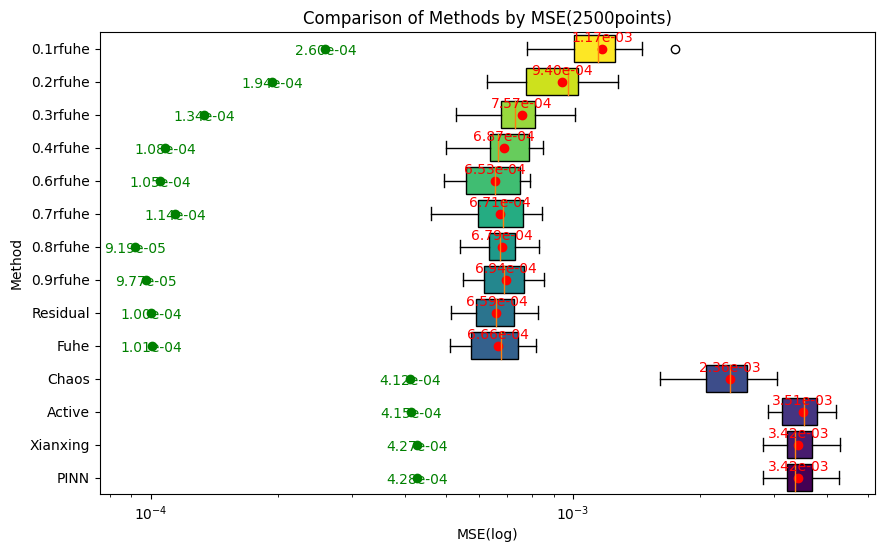

In [48]:
# 示例数据
methods = ['PINN', 'Xianxing', 'Active', 'Chaos', 'Fuhe', 'Residual', '0.9rfuhe', '0.8rfuhe', '0.7rfuhe', '0.6rfuhe', '0.4rfuhe', '0.3rfuhe', '0.2rfuhe', '0.1rfuhe']
seeds = range(10)
loss_values = {
    'PINN': [0.003316751801343714, 0.0028703311995164587, 0.003882743380260447, 0.003201781491098628, 0.003398057194813317, 0.0034277741397912807, 0.003771971945786248, 0.003236714800041008, 0.002816690608562188, 0.004275838077790237],
    'Xianxing': [0.003311304371606066, 0.0028753722713035423, 0.003880836265234992, 0.003208536914129459, 0.0034001700202233973, 0.00342800941672671, 0.003770713620150456, 0.0032381600687992375, 0.0028191363372824644, 0.0042792722986088475],
    'Active': [0.002963986450744357, 0.003005871465494847, 0.0036635393672544954, 0.003936678669087864, 0.0038261167392405556, 0.0034887218451726265, 0.0035251372292895706, 0.0035429705797297164, 0.0028944467641415944, 0.004203483779171507],
    'Chaos': [0.002217254883531672, 0.0016069040238001417, 0.003046454260352535, 0.0019857261815071844, 0.0026020139165924003, 0.0022023243138879394, 0.0025226292368338904, 0.002490137589767257, 0.002017788527649182, 0.0028671310737034047],
    'Fuhe': [0.0005625648275876623, 0.0007453788336368962, 0.0008171217794812243, 0.0006036987991190489, 0.0006303293815839735, 0.0007261090453213897, 0.0005580250226204733, 0.000718182779558296, 0.0005120050094250255, 0.0007864403233353188],
    'Residual': [0.0005178607922083717, 0.0007250336842892592, 0.0007254219171688984, 0.0006446042884731045, 0.000583584960975436, 0.0007780779731343396, 0.0005132242048536012, 0.0008253336525253384, 0.0006075473168689801, 0.0006699941008987727],
    '0.9rfuhe': [0.0005481898271531804, 0.0008206650035511413, 0.0007228367912873229, 0.0006538276035345801, 0.0006017199952596161, 0.000856035205666236, 0.0005794751720360116, 0.0007816480662884135, 0.0006798469037009912, 0.0006922989130313271],
    '0.8rfuhe': [0.0005519149659294044, 0.0008331683631926415, 0.00074094987320393, 0.0006930649339883276, 0.0006324997971556287, 0.0008084342466810889, 0.0005396528726513639, 0.0006900838281163284, 0.0006405828928549712, 0.0006555647132899154],
    '0.7rfuhe': [0.0005314243157011713, 0.0008448687835435158, 0.0006856746990410136, 0.0007663047507727054, 0.0006205593582205081, 0.000785193148676028, 0.0004611456216748079, 0.0007407308238581526, 0.0005876820003328984, 0.00068392411399989],
    '0.6rfuhe': [0.0005634086471958552, 0.0007490744682883576, 0.0007826896589568202, 0.0006151445598615974, 0.0005561548480454065, 0.0007897830991295199, 0.000495561927280612, 0.0006955070948115975, 0.0005416867396163443, 0.0007457787503214749],
    '0.4rfuhe': [0.0006736543983356181, 0.0005591169950362833, 0.000851694227809974, 0.000633657961721812, 0.0007033068202897371, 0.0008184137857671996, 0.0006595342792010075, 0.0006498564769140951, 0.0005015928656703073, 0.0008170814227172172],
    '0.3rfuhe': [0.0007216816835408102, 0.0006540451642973779, 0.0009397879670125524, 0.0007169604503954953, 0.0007378544124933429, 0.0008301928212315527, 0.0007659645372436638, 0.0006623434135399489, 0.0005293068406977204, 0.0010137394781562525],
    '0.2rfuhe': [0.000990889411966234, 0.0007517240101769034, 0.0011995666482834625, 0.0008185392288505159, 0.0009801571264610608, 0.0009626996727849493, 0.0010372374903792458, 0.0007587348004701809, 0.0006263600174834683, 0.001275602225285554],
    '0.1rfuhe': [0.0012862274063976322, 0.0009576478753520815, 0.0014562728163871384, 0.0010192999945857753, 0.0011862580798714128, 0.0011308917259414775, 0.001163082442029896, 0.001003487652121172, 0.0007801813998173633, 0.0017436082681014581]
}

# 创建图像
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制箱线图
data = [loss_values[method] for method in methods]
box = ax.boxplot(data, vert=False, patch_artist=True, labels=methods, widths=0.8)

# 生成颜色
colors = cm.viridis(np.linspace(0, 1, len(methods)))
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# 设置对数刻度
ax.set_xscale('log')

# 计算均值和标准差，并在图中标注
for i, method in enumerate(methods):
    mean = np.mean(loss_values[method])
    std = np.std(loss_values[method])
    ax.scatter(mean, i + 1, color='red', zorder=2)  # 标注均值
    ax.scatter(std, i + 1, color='green', zorder=2)  # 标注标准差
    ax.text(mean, i + 1.2, f'{mean:.2e}', color='red', ha='center')  # 标注均值具体值
    ax.text(std, i + 0.8, f'{std:.2e}', color='green', ha='center')  # 标注标准差具体值

# 添加标题和标签
ax.set_title('Comparison of Methods by MSE(2500points)')
ax.set_xlabel('MSE(log)')
ax.set_ylabel('Method')

# 显示图像
plt.show()

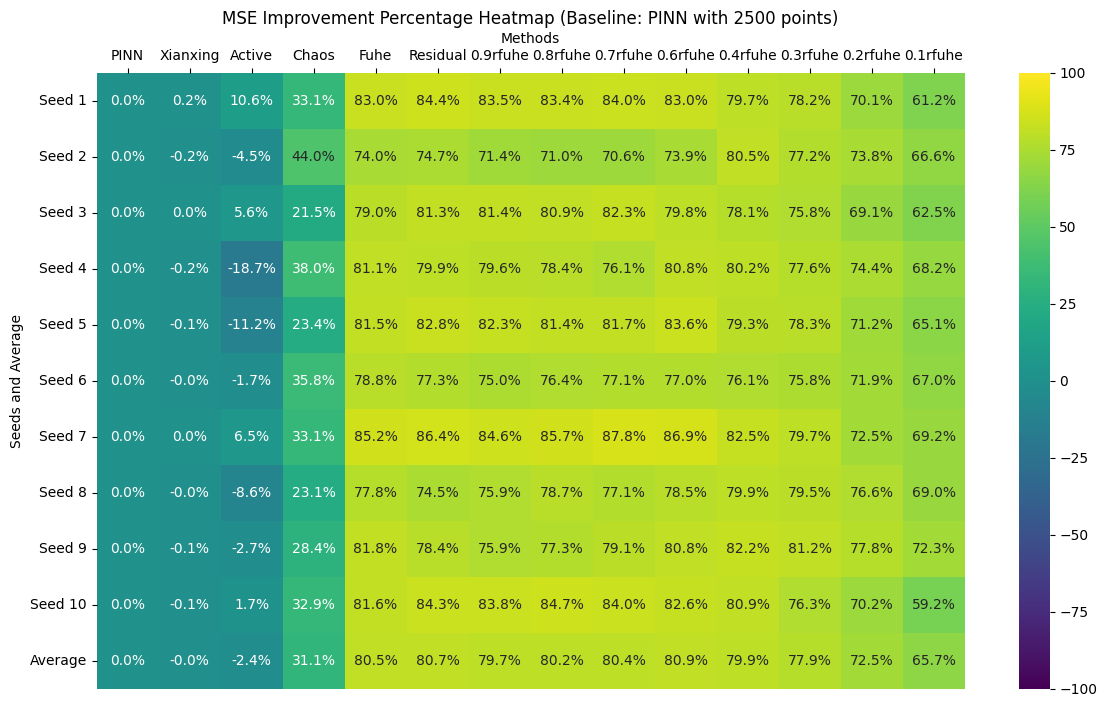

In [50]:
# 选择基准方法
baseline_method = 'PINN'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MSE Improvement Percentage Heatmap (Baseline: {baseline_method} with 2500 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



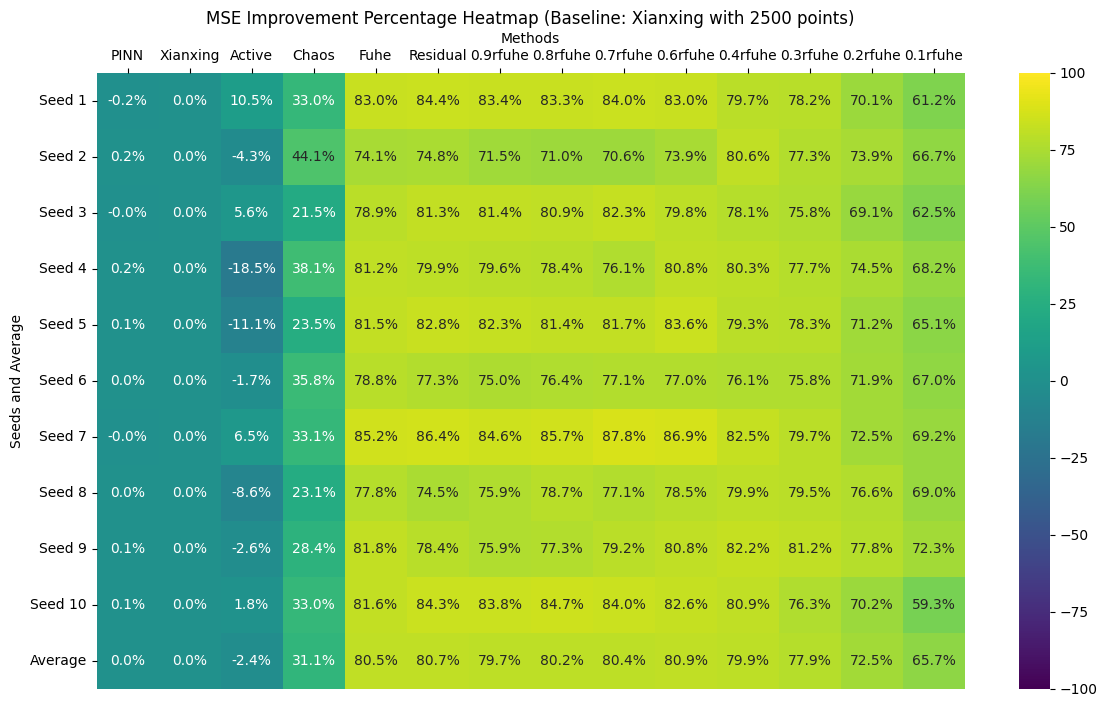

In [51]:
# 选择基准方法
baseline_method = 'Xianxing'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MSE Improvement Percentage Heatmap (Baseline: {baseline_method} with 2500 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



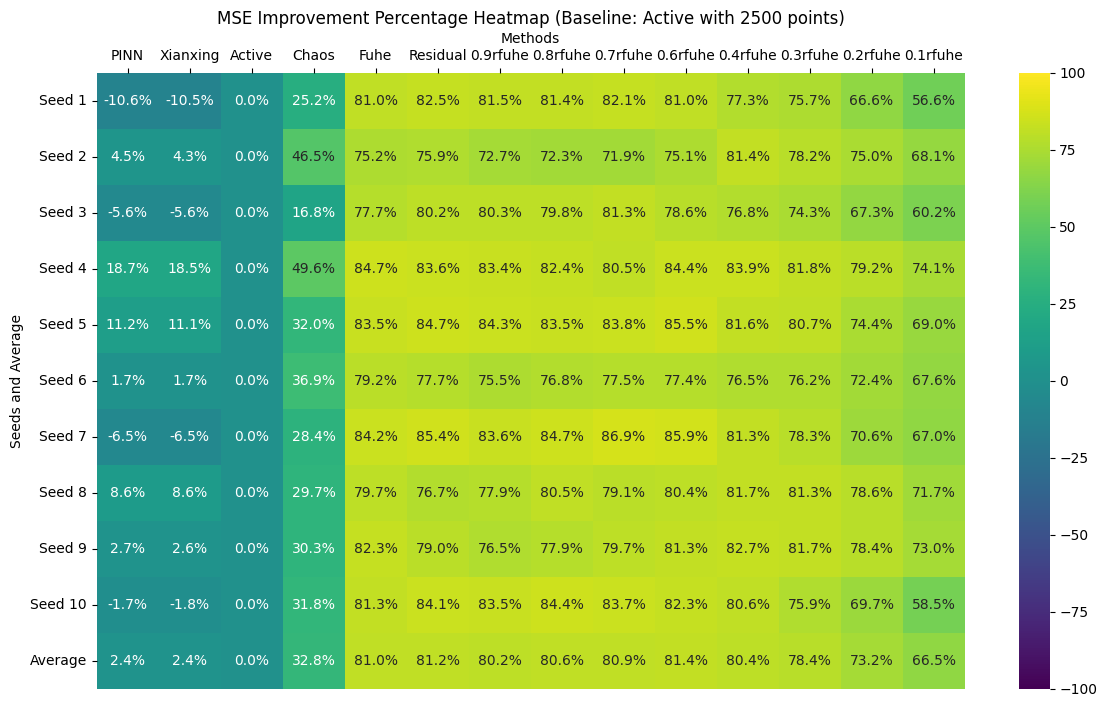

In [52]:
# 选择基准方法
baseline_method = 'Active'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MSE Improvement Percentage Heatmap (Baseline: {baseline_method} with 2500 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



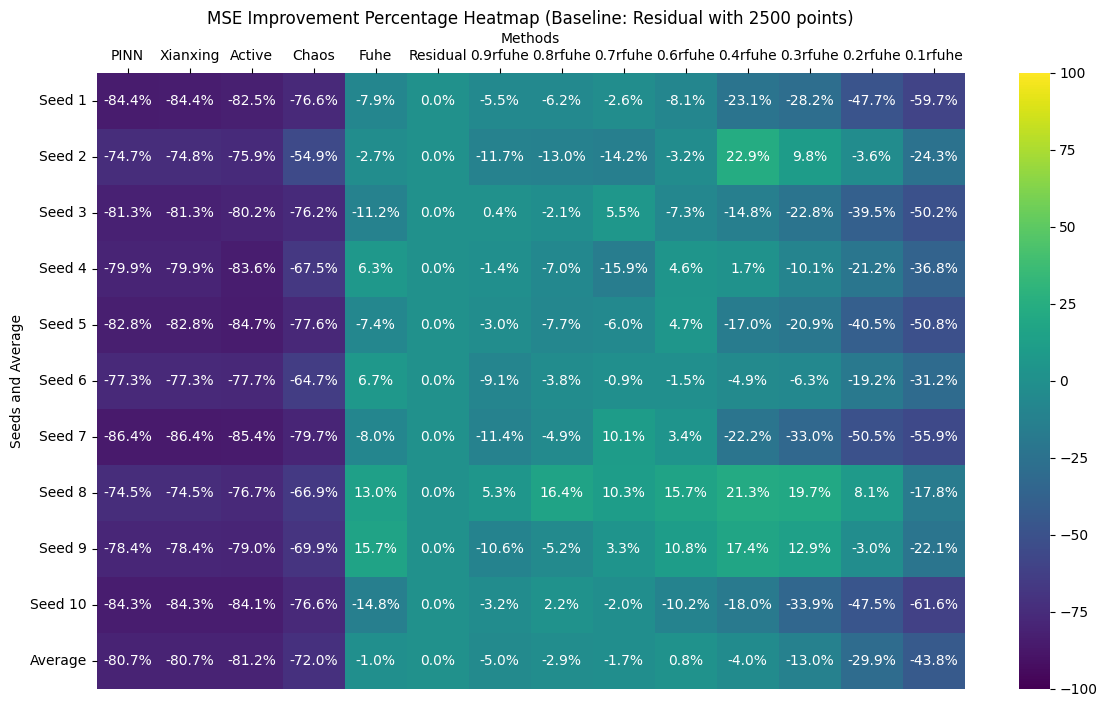

In [53]:
# 选择基准方法
baseline_method = 'Residual'  # 或者 'Active'

# 计算误差进步百分比
improvement_percentages = {}
for method in methods:
    improvement_percentages[method] = []
    for i in range(len(seeds)):
        baseline_loss = loss_values[baseline_method][i]
        method_loss = loss_values[method][i]
        if method_loss < baseline_loss:
            improvement_percentage = ((baseline_loss - method_loss) / baseline_loss) * 100
        else:
            improvement_percentage = ((baseline_loss - method_loss) / method_loss) * 100
        improvement_percentages[method].append(improvement_percentage)

# 转换为矩阵
improvement_matrix = np.array([improvement_percentages[method] for method in methods])
# 转置矩阵，方法作为列，种子作为行
improvement_matrix_transposed = improvement_matrix.T

# 计算每种方法的平均误差
average_losses = {method: np.mean(loss_values[method]) for method in methods}
baseline_average_loss = average_losses[baseline_method]

# 计算平均误差的百分比差距
average_improvement_percentages = []
for method in methods:
    method_average_loss = average_losses[method]
    if method_average_loss < baseline_average_loss:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / baseline_average_loss) * 100
    else:
        average_improvement_percentage = ((baseline_average_loss - method_average_loss) / method_average_loss) * 100
    average_improvement_percentages.append(average_improvement_percentage)

# 添加均值作为新的一行
improvement_matrix_with_avg = np.vstack([improvement_matrix_transposed, average_improvement_percentages])

# 转换为字符串矩阵并加上百分号
annot_matrix = np.array([[f"{value:.1f}%" for value in row] for row in improvement_matrix_with_avg])

# 更新标签，添加 "Average"
row_labels = [f'Seed {i+1}' for i in range(len(seeds))] + ["Average"]
col_labels = methods

# 绘制热图
plt.figure(figsize=(14, 8))
ax = sns.heatmap(improvement_matrix_with_avg, annot=annot_matrix, fmt="", cmap="viridis", 
                 xticklabels=col_labels, yticklabels=row_labels, vmin=-100, vmax=100)

ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title(f'MSE Improvement Percentage Heatmap (Baseline: {baseline_method} with 2500 points)')
plt.xlabel('Methods')
plt.ylabel('Seeds and Average')
plt.show()



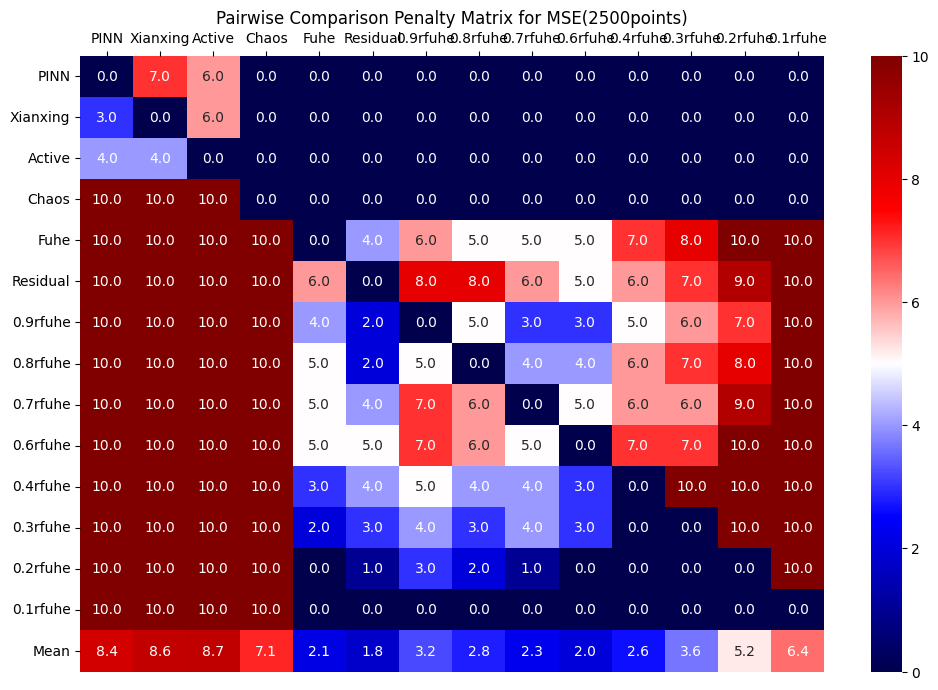

In [55]:
# 初始化惩罚矩阵
n_methods = len(methods)
penalty_matrix = np.zeros((n_methods, n_methods))

# 计算惩罚矩阵
for i, method_i in enumerate(methods):
    for j, method_j in enumerate(methods):
        if i != j:
            for k in range(len(loss_values[method_i])):
                if loss_values[method_i][k] < loss_values[method_j][k]:
                    penalty_matrix[i, j] += 1

# 计算列平均值
column_means = np.mean(penalty_matrix, axis=0)

# 添加列平均值到惩罚矩阵的底部
penalty_matrix_with_means = np.vstack([penalty_matrix, column_means])

# 创建热图
plt.figure(figsize=(12, 8))
ax = sns.heatmap(penalty_matrix_with_means, annot=True, fmt=".1f", cmap="seismic", xticklabels=methods, yticklabels=methods + ['Mean']) #cmap是颜色映射，annot是是否显示数值，fmt是数值格式

# 将x轴标签移动到顶部
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title('Pairwise Comparison Penalty Matrix for MSE(2500points)')
# plt.xlabel('Methods')
# plt.ylabel('Methods')
plt.show()
